# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [1]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [2]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [3]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [4]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [6]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [7]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [8]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [9]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [10]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [11]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position Team  GF  GA Points
count         4    4   4   4      4
unique        4    4   3   4      4
top           1  PSV  75  30     79
freq          1    1   2   1      1


In [12]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [13]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [14]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [15]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [16]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [17]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [18]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 


## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>


## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>


## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>

In [20]:
# Selection of the hyperparameter
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Then get X and y
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response, train_size=0.7, random_state=42)

# Print shapes of array
for array in (X_train, X_test, y_train, y_test):
    print(array.shape)

# Now perform cross-validation

# Initialize lasso model, with random state for reproducibility
lasso = Lasso(random_state=42, max_iter=100000) # Number of iterations increased, otherwise did not converge

# Set alpha values to test
parameters = {"alpha": np.logspace(-3,3,99)}

# Set folds
cv = 5

# Initialize grid search
grid_search_clf = GridSearchCV(estimator=lasso, # Lasso estimator
                               param_grid=parameters, # Alpha values to test
                               scoring="neg_mean_squared_error", # Negative MSE
                               cv=cv) # Cross-validation

# And fit
grid_search_clf.fit(X_train, y_train)

# Get best elements and print details
best_alpha = grid_search_clf.best_params_["alpha"]
best_score = grid_search_clf.best_score_
best_estimator = grid_search_clf.best_estimator_

y_pred = best_estimator.predict(X_test)

print(f"Best alpha: {best_alpha}")
print(f"Best MSE: {-best_score}")

print(f"MSE test set: {mean_squared_error(y_test, y_pred)}")

(103, 238)
(45, 238)
(103, 1)
(45, 1)
Best alpha: 1.0
Best MSE: 5.19649422186056
MSE test set: 5.794489013506154


In [21]:
print(parameters)

{'alpha': array([1.00000000e-03, 1.15139540e-03, 1.32571137e-03, 1.52641797e-03,
       1.75751062e-03, 2.02358965e-03, 2.32995181e-03, 2.68269580e-03,
       3.08884360e-03, 3.55648031e-03, 4.09491506e-03, 4.71486636e-03,
       5.42867544e-03, 6.25055193e-03, 7.19685673e-03, 8.28642773e-03,
       9.54095476e-03, 1.09854114e-02, 1.26485522e-02, 1.45634848e-02,
       1.67683294e-02, 1.93069773e-02, 2.22299648e-02, 2.55954792e-02,
       2.94705170e-02, 3.39322177e-02, 3.90693994e-02, 4.49843267e-02,
       5.17947468e-02, 5.96362332e-02, 6.86648845e-02, 7.90604321e-02,
       9.10298178e-02, 1.04811313e-01, 1.20679264e-01, 1.38949549e-01,
       1.59985872e-01, 1.84206997e-01, 2.12095089e-01, 2.44205309e-01,
       2.81176870e-01, 3.23745754e-01, 3.72759372e-01, 4.29193426e-01,
       4.94171336e-01, 5.68986603e-01, 6.55128557e-01, 7.54312006e-01,
       8.68511374e-01, 1.00000000e+00, 1.15139540e+00, 1.32571137e+00,
       1.52641797e+00, 1.75751062e+00, 2.02358965e+00, 2.32995181e+

Iteration: 1 ...
Iteration: 2 ...
Iteration: 3 ...
Iteration: 4 ...
Iteration: 5 ...
Iteration: 6 ...


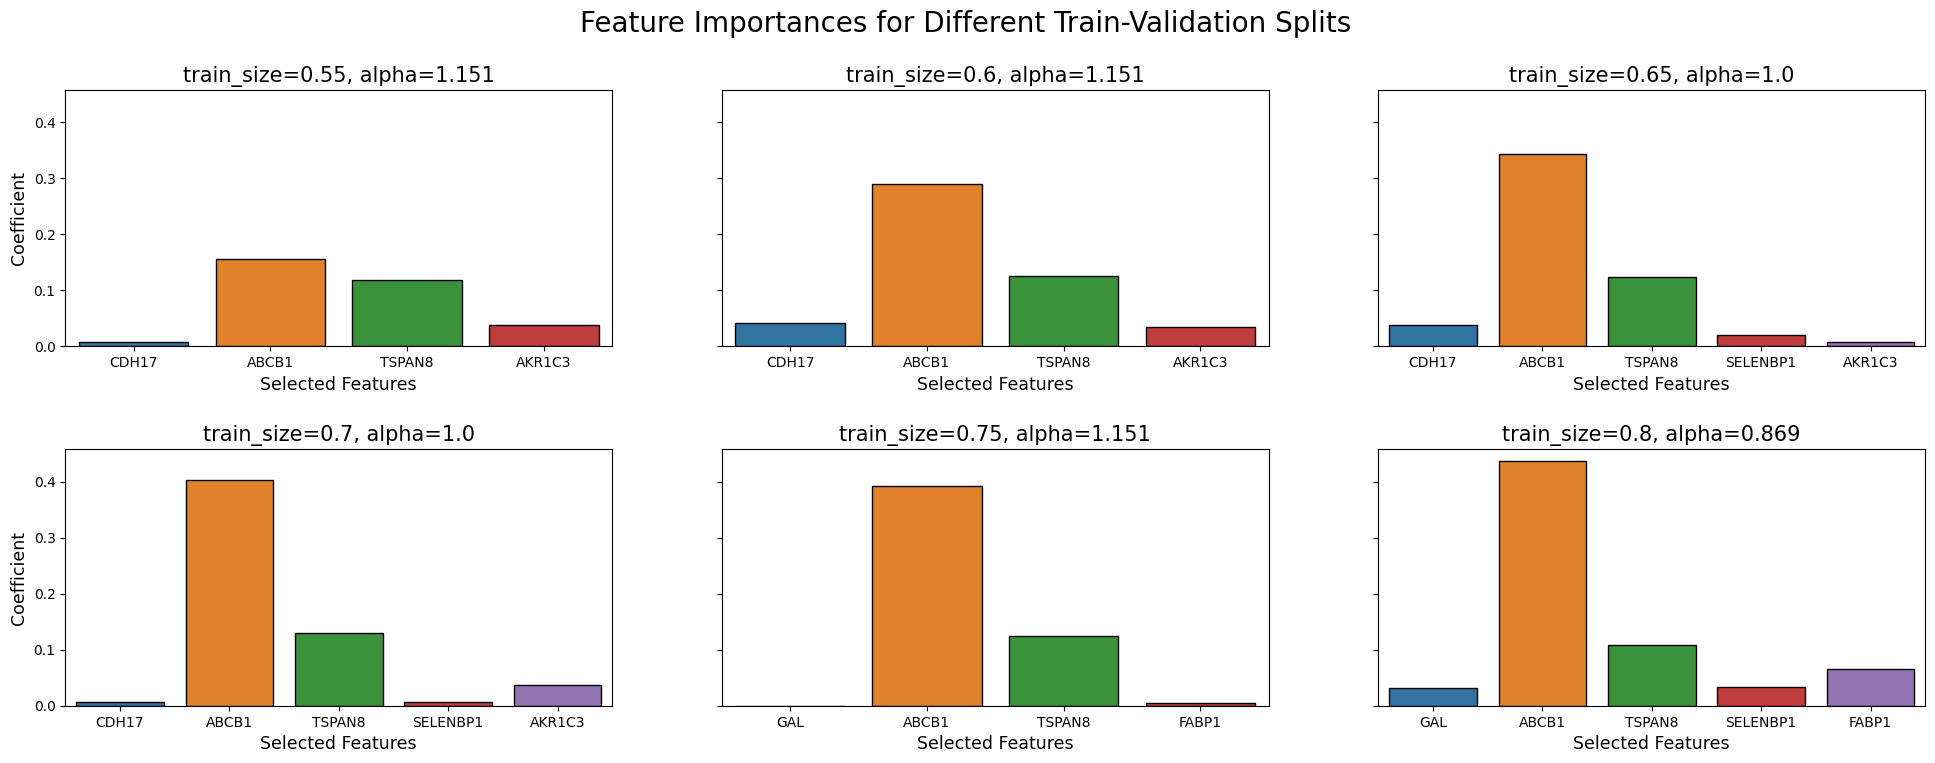

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Now fit best model
best_estimator.fit(X_train, y_train)

# Plot important features
coefficients = best_estimator.coef_
selected_features = best_estimator.feature_names_in_[coefficients > 0]
coefficients = coefficients[coefficients > 0]

# Investigate how different train-validation splits influence the feature importances
# Select train sizes
train_sizes = np.linspace(0.55, 0.8, 6)

# Visualize effects of different training sizes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 8), sharey=True)

for i, (ax, train_size) in enumerate(zip(axes.flatten(), train_sizes)):
    print(f"Iteration: {i + 1} ...")

    # Split data
    X_train, _, y_train, _ = train_test_split(gene_expression, drug_response, train_size=train_size, random_state=42)

    # Now fit best model
    # best_estimator.fit(X_train, y_train)
    # Initialize lasso model, with random state for reproducibility
    lasso = Lasso(random_state=42, max_iter=100000) # Number of iterations increased, otherwise did not converge

    # Set alpha values to test
    parameters = {"alpha": np.logspace(-3, 3, 99)}

    # Set folds
    cv = 5

    # Initialize grid search
    grid_search_clf = GridSearchCV(estimator=lasso, # Lasso estimator
                                param_grid=parameters, # Alpha values to test
                                scoring="neg_mean_squared_error", # Negative MSE
                                cv=cv) # Cross-validation

    # And fit
    grid_search_clf.fit(X_train, y_train)

    # Get best elements and print details
    best_alpha = grid_search_clf.best_params_["alpha"]
    best_score = grid_search_clf.best_score_
    best_estimator = grid_search_clf.best_estimator_

    # Plot important features
    coefficients = best_estimator.coef_
    selected_features = best_estimator.feature_names_in_[coefficients > 0]
    coefficients = coefficients[coefficients > 0]

    sns.barplot(x=selected_features, 
                y=coefficients, 
                edgecolor='black', 
                hue=selected_features,
                ax=ax)
    ax.set_xlabel("Selected Features", fontsize=12.5)
    ax.set_ylabel("Coefficient", fontsize=12.5)
    ax.set_title(f"train_size={round(train_size, 2)}, alpha={round(best_alpha, 3)}", fontsize=15)

fig.suptitle("Feature Importances for Different Train-Validation Splits", fontsize=20)
plt.subplots_adjust(hspace=0.4)
plt.show()

We see that the partitioning in training and validation sets does not seem to play a role in the selection of the hyperparameter. For all train sizes, an alpha value $\alpha = 1$ always produced the lowest mean squared error. However, we do observe that the feature importances are quite different. While the `ABCB1` gene always seems to be the most important feature and the `TSPAN8` the second most important feature, the other selected features can vary. For example, the `FABP1` is selected with a `train_size` of 0.75 and 0.8, but not with lower training sizes. The reverse can be said about the `AKR1C3` gene.

In [28]:
# Bias-variance
# Determine some alpha values
# alphas = 10.**(np.arange(-3, 4))
alphas = np.logspace(-3,3,19)

# To bootstrap
from sklearn.utils import resample
import tqdm

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response, test_size=0.3, random_state=42)

# Set number of bootstraps
n_bootstraps = 100

# Initialize array with 100 coefficient values for all alphas
model_coefs = np.zeros((len(alphas), n_bootstraps, X_train.shape[1]))

# Now bootstrap
for i, alpha in enumerate(alphas):

    print(f"Iteration: {i}")

    # Initialize lasso
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=100000)

    # Sample bootstraps and compute coefficients
    for n in tqdm.trange(n_bootstraps):

        # Bootstrapped samples -- 1/3 of original dataset, with replacement for now
        X_b, y_b = resample(X_train, y_train, n_samples=X_train.shape[0]//3, random_state=n)

        # Fit model and store coefficients
        lasso.fit(X_b, y_b)
        model_coefs[i, n, :] = lasso.coef_

Iteration: 0


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:08<00:00, 12.33it/s]


Iteration: 1


100%|██████████| 100/100 [00:06<00:00, 15.24it/s]


Iteration: 2


100%|██████████| 100/100 [00:04<00:00, 21.50it/s]


Iteration: 3


100%|██████████| 100/100 [00:03<00:00, 30.19it/s]


Iteration: 4


100%|██████████| 100/100 [00:02<00:00, 43.79it/s]


Iteration: 5


100%|██████████| 100/100 [00:01<00:00, 61.36it/s]


Iteration: 6


100%|██████████| 100/100 [00:00<00:00, 105.40it/s]


Iteration: 7


100%|██████████| 100/100 [00:00<00:00, 162.40it/s]


Iteration: 8


100%|██████████| 100/100 [00:00<00:00, 189.41it/s]


Iteration: 9


100%|██████████| 100/100 [00:00<00:00, 225.45it/s]


Iteration: 10


100%|██████████| 100/100 [00:00<00:00, 199.05it/s]


Iteration: 11


100%|██████████| 100/100 [00:00<00:00, 222.42it/s]


Iteration: 12


100%|██████████| 100/100 [00:00<00:00, 208.73it/s]


Iteration: 13


100%|██████████| 100/100 [00:00<00:00, 234.92it/s]


Iteration: 14


100%|██████████| 100/100 [00:00<00:00, 246.33it/s]


Iteration: 15


100%|██████████| 100/100 [00:00<00:00, 271.96it/s]


Iteration: 16


100%|██████████| 100/100 [00:00<00:00, 251.94it/s]


Iteration: 17


100%|██████████| 100/100 [00:00<00:00, 240.36it/s]


Iteration: 18


100%|██████████| 100/100 [00:00<00:00, 200.29it/s]


  0%|          | 0/238 [00:00<?, ?it/s]

100%|██████████| 238/238 [00:00<00:00, 916.94it/s]


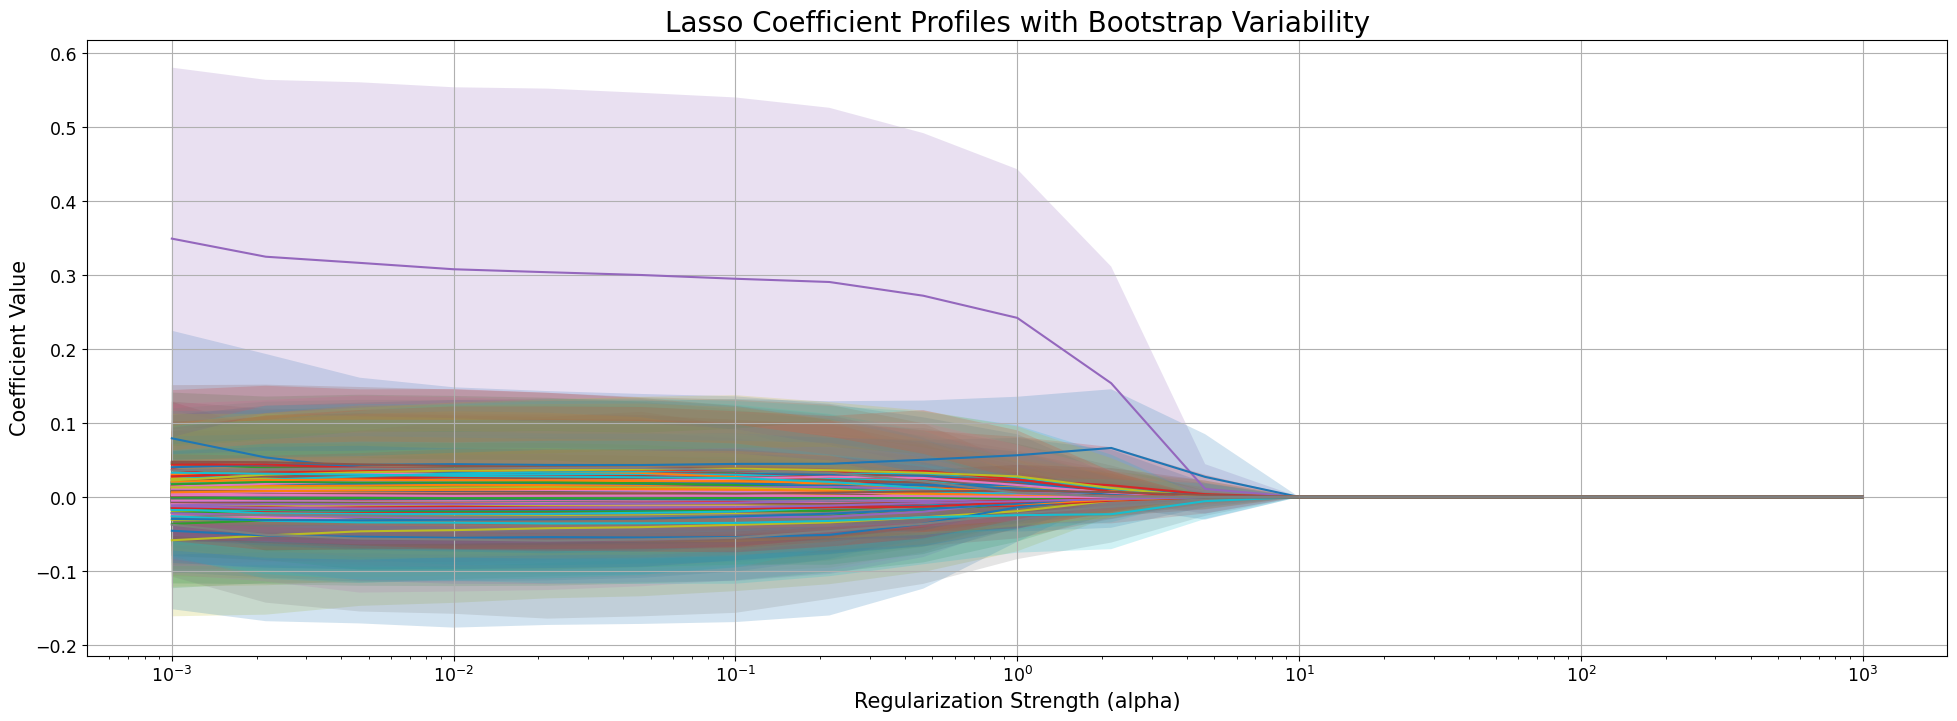

In [29]:
# Then visualize the mean coefficients for all alphas
# Store means and standard deviations in arrays
coef_means = np.mean(model_coefs, axis=1)
coef_stds = np.std(model_coefs, axis=1)

# Then plot
plt.figure(figsize=(24, 8))

# Loop over features
for feature_idx in tqdm.trange(X_train.shape[1]):
    plt.plot(alphas, coef_means[:, feature_idx]) # Plot means
    plt.fill_between(x=alphas, # For all alpha values
                     y1=coef_means[:, feature_idx] - coef_stds[:, feature_idx], # From lower bound
                     y2=coef_means[:, feature_idx] + coef_stds[:, feature_idx], # To upper bound
                     alpha=0.2 # Lighter color
                    )

# Set x scale to log
plt.xscale("log")
plt.xlabel('Regularization Strength (alpha)', fontsize=15)
plt.ylabel('Coefficient Value', fontsize=15)
plt.title('Lasso Coefficient Profiles with Bootstrap Variability', fontsize=20)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.grid(True)
plt.show()

The more regularization is applied, the more the mean coefficient values converge around 0. This means that, in a more complex model (i.e., `alpha` is small), many parameter coefficients are different from 0. However, the variance (`std`) is also relatively large. The more regularization is applied (i.e., the greater `alpha` becomes), the more the parameter coefficients start to converge around 0. Additionally, the variance also gradually increases and eventually also converges around 0. This means that for more complex models, the variance becomes 0.